In [1]:

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3D Visualization 
import plotly as py
import plotly.graph_objs as go

In [2]:
# importation du dataset
df=pd.read_csv("segmentattion.txt", delimiter="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
#liste complete des variables

list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

## analyse exploratoire de données
### objectif :
.Comprendre du mieux nos données
.Developper une premiere stratégie de modelisation

### checklist de base
### Analyse de forme:
.La variable a predire (variable target):

.Ligne et colonnes: (2240 lignes, 29 colonnes)

.types de variable: 3 variables qualitatives et 26 variable quantitatives

.Analyse de valeurs manquantes: 24 valeurs manquantes dans la variable INCOME

### Analyse de fond:
.Visualisation de la target: pas de target 

.Signification des variables:n la variables Dt_Customer considere comme une varible qualitative mais ne peut etre visualiser besoin d etre normaliser


visualisation des differente variables (quantitative et qualitative)

.Relation Variables /Target:

## analyse plus detaillé
.Rélation variable/variable
.analyse des valeures manquantes

## hypothese nulle(HO):

##conclusion initiale


# Analyse de fome

In [4]:
df.shape

(2240, 29)

In [5]:
#combien de types de variables
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

In [6]:
# valeures manques
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
# voir les differente variables qualitative ou quantitative . permet aussi de voir si il y a des valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# la variable ID ne sevira pas 
df = df.drop(['ID'], axis=1)
df


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [10]:
# liste completes des variables quantitative
data=df.select_dtypes(include="object")
list(data.columns)

['Education', 'Marital_Status', 'Dt_Customer']

<Figure size 432x288 with 0 Axes>

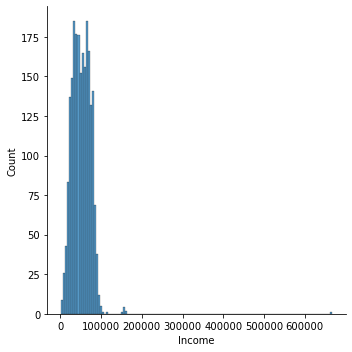

In [11]:
for col in df.select_dtypes(include=float):
    plt.figure()
    sns.displot(df[col])
 

<ipython-input-12-95597d04513e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


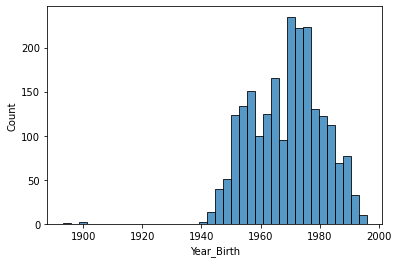

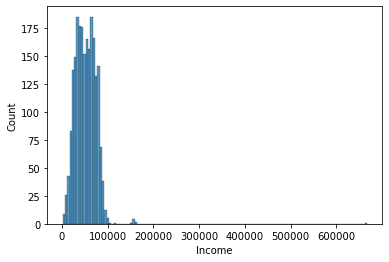

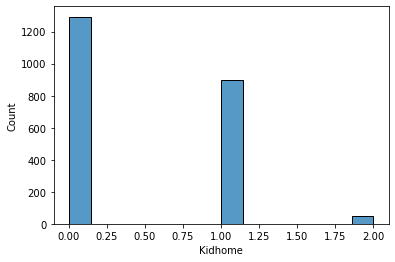

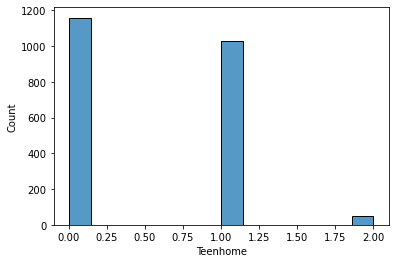

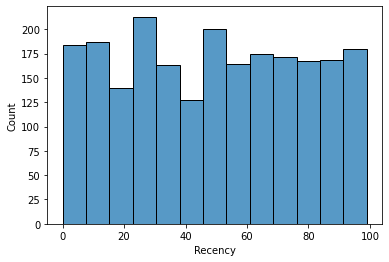

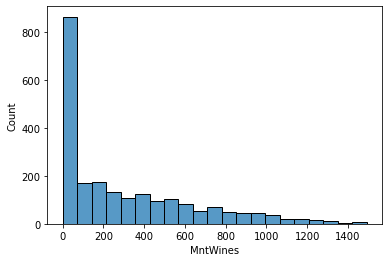

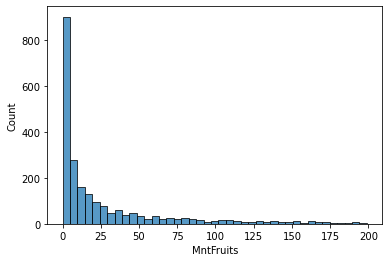

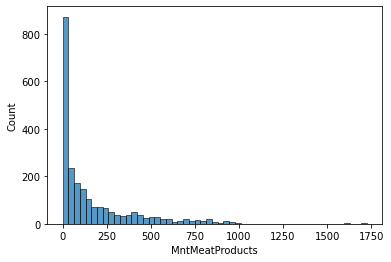

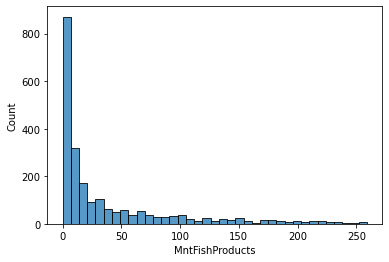

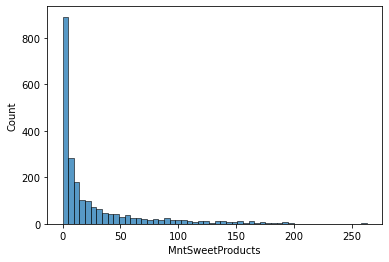

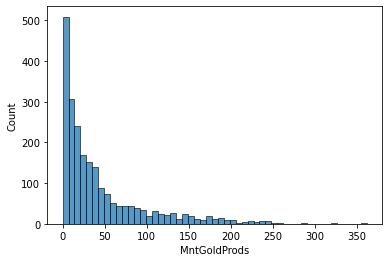

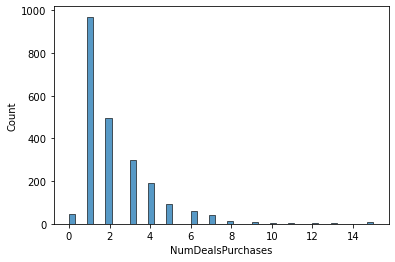

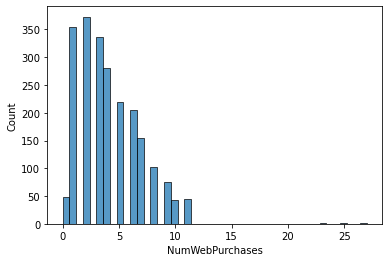

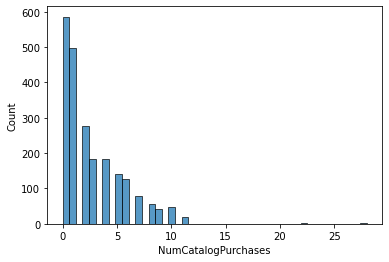

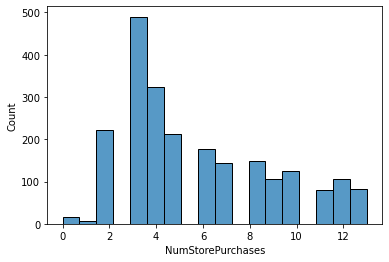

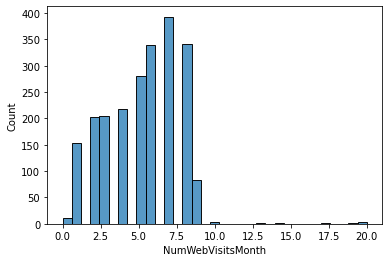

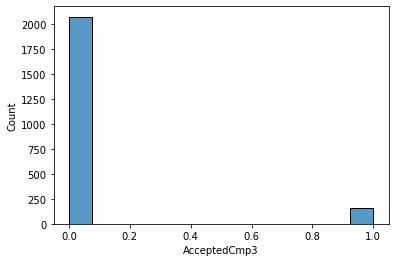

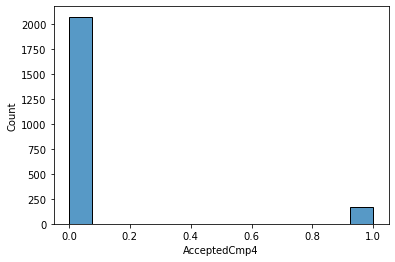

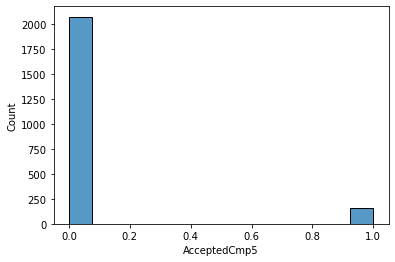

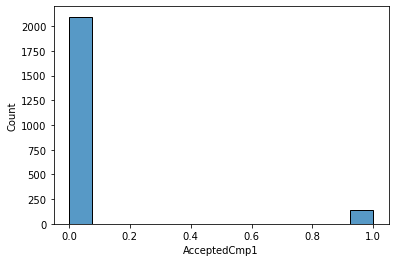

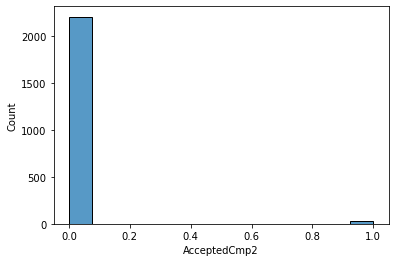

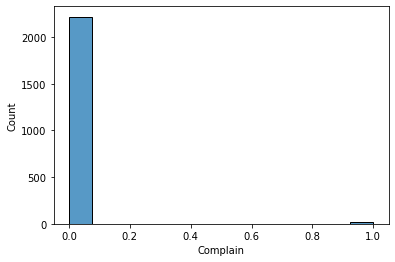

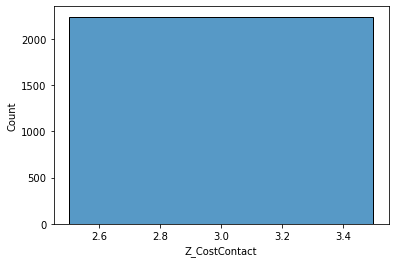

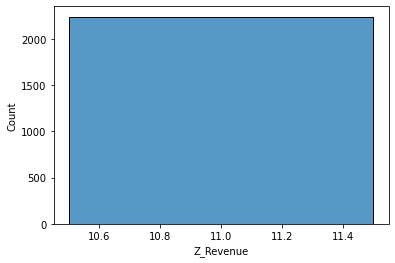

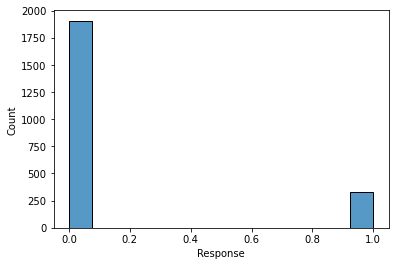

In [12]:
for col in df.select_dtypes(np.number):
    plt.figure()
    sns.histplot(df[col])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

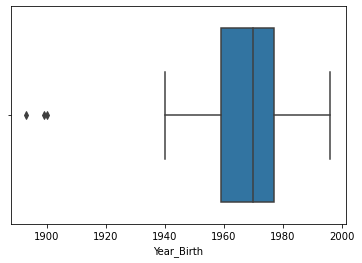

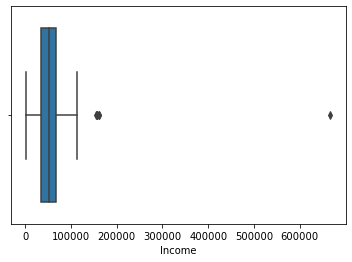

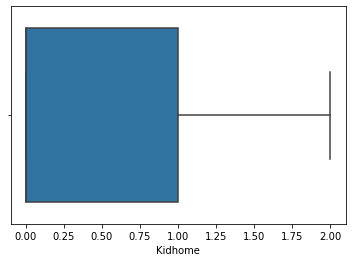

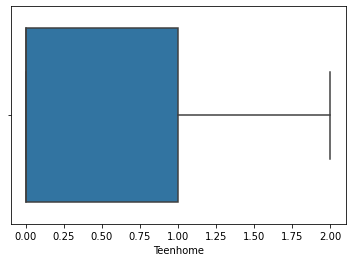

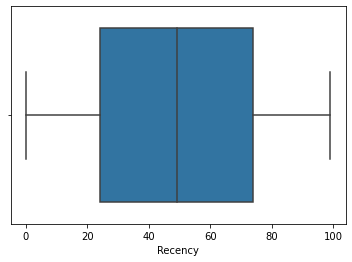

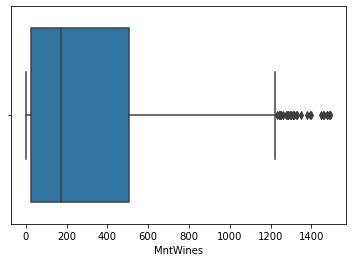

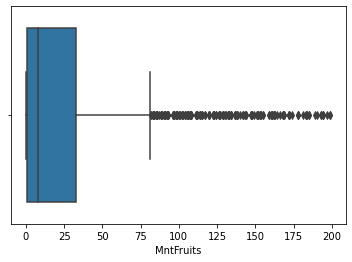

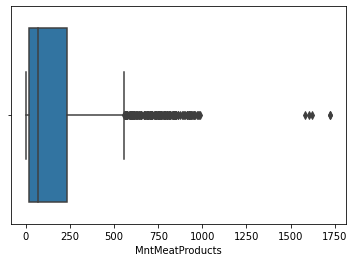

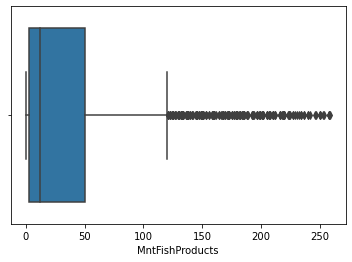

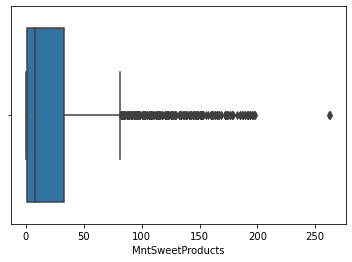

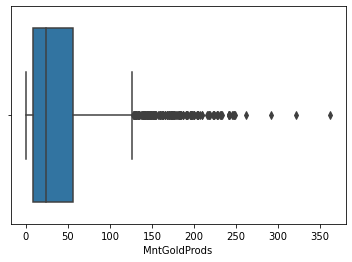

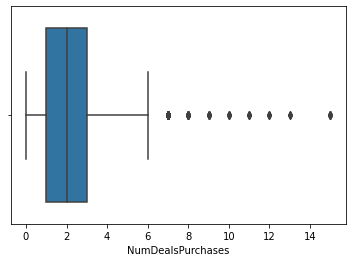

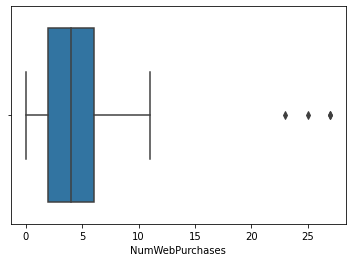

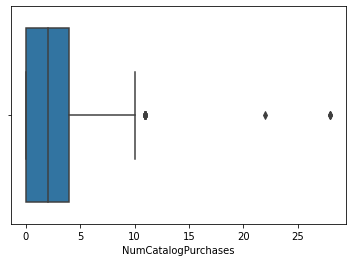

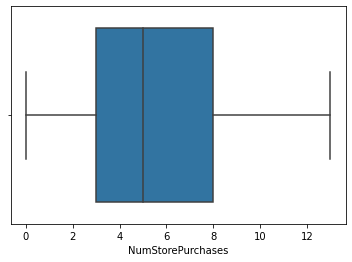

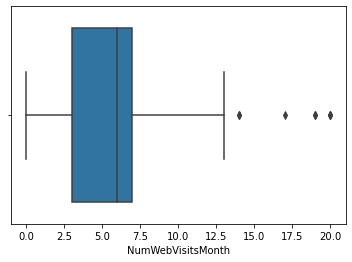

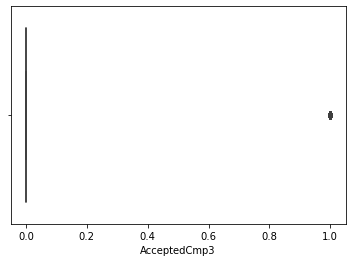

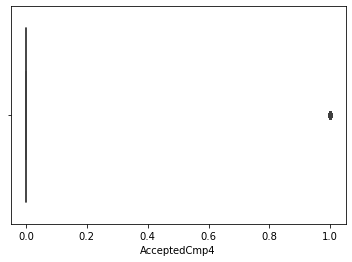

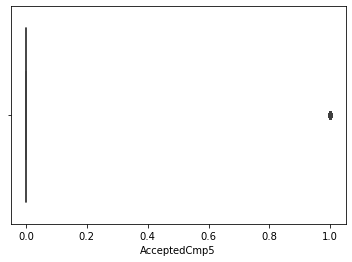

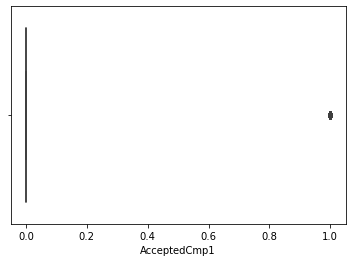

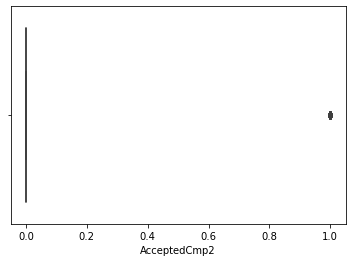

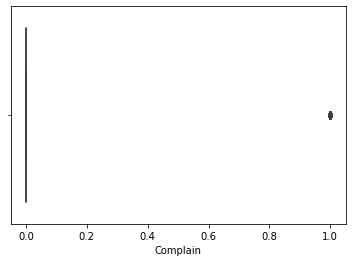

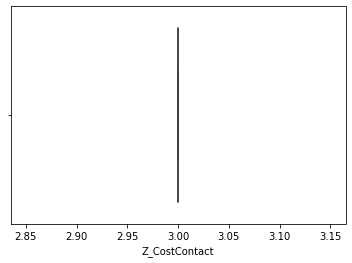

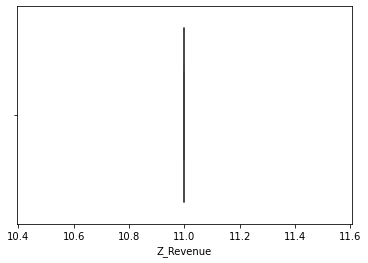

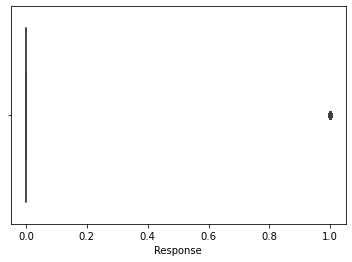

In [13]:
for col in df.select_dtypes(np.number):
    plt.figure()
    sns.boxplot(df[col])

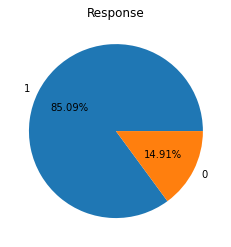

In [14]:
plt.pie(df['Response'].value_counts(), autopct= "%1.2f%%", labels=df['Response'].unique());
plt.title('Response');

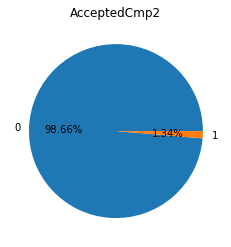

In [15]:
plt.pie(df['AcceptedCmp2'].value_counts(), autopct= "%1.2f%%", labels=df['AcceptedCmp2'].unique());
plt.title('AcceptedCmp2');

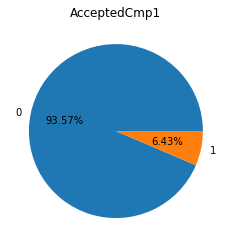

In [16]:
plt.pie(df['AcceptedCmp1'].value_counts(), autopct= "%1.2f%%", labels=df['AcceptedCmp1'].unique());
plt.title('AcceptedCmp1');

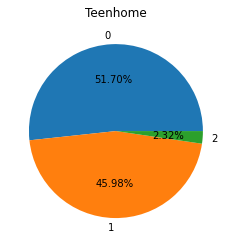

In [17]:

plt.pie(df['Teenhome'].value_counts(), autopct= "%1.2f%%", labels=df['Teenhome'].unique());
plt.title('Teenhome');

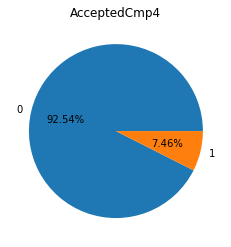

In [18]:
plt.pie(df['AcceptedCmp4'].value_counts(), autopct= "%1.2f%%", labels=df['AcceptedCmp4'].unique());
plt.title('AcceptedCmp4');


In [19]:
df= df.drop(['Z_CostContact'], axis=1)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,4,5,0,0,0,0,0,0,11,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,5,7,0,0,0,1,0,0,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,13,6,0,1,0,0,0,0,11,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,10,3,0,0,0,0,0,0,11,0


In [20]:
# la variable ID ne sevira pas 
df = df.drop(['Z_Revenue'], axis=1)
df


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [21]:
## Fonction pour calculer l'age de nos différents clients
def annees_ages(valeur):
    dateCourant = datetime.now()
    date=dateCourant.date()
    annee = date.strftime("%Y")
    age = int(annee) - valeur
    return age
df['Ages'] = df['Year_Birth'].map(annees_ages)


In [22]:
df['Ages']

0       64
1       67
2       56
3       37
4       40
        ..
2235    54
2236    75
2237    40
2238    65
2239    67
Name: Ages, Length: 2240, dtype: int64

In [23]:
# la variable ID ne sevira pas 
df = df.drop(['Year_Birth'], axis=1)
df


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,4,7,0,0,0,0,0,0,1,64
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,2,5,0,0,0,0,0,0,0,67
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,...,10,4,0,0,0,0,0,0,0,56
3,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,...,4,6,0,0,0,0,0,0,0,37
4,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,...,6,5,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,...,4,5,0,0,0,0,0,0,0,54
2236,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,...,5,7,0,0,0,1,0,0,0,75
2237,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,...,13,6,0,1,0,0,0,0,0,40
2238,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,...,10,3,0,0,0,0,0,0,0,65


In [24]:
df = df.drop(['Dt_Customer'], axis=1)
df


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,64
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,67
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,56
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,37
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,4,5,0,0,0,0,0,0,0,54
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,5,7,0,0,0,1,0,0,0,75
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,13,6,0,1,0,0,0,0,0,40
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,10,3,0,0,0,0,0,0,0,65


In [25]:
df.shape

(2240, 25)

Text(0.5, 1.0, 'visualisation de age en fonction du revenu')

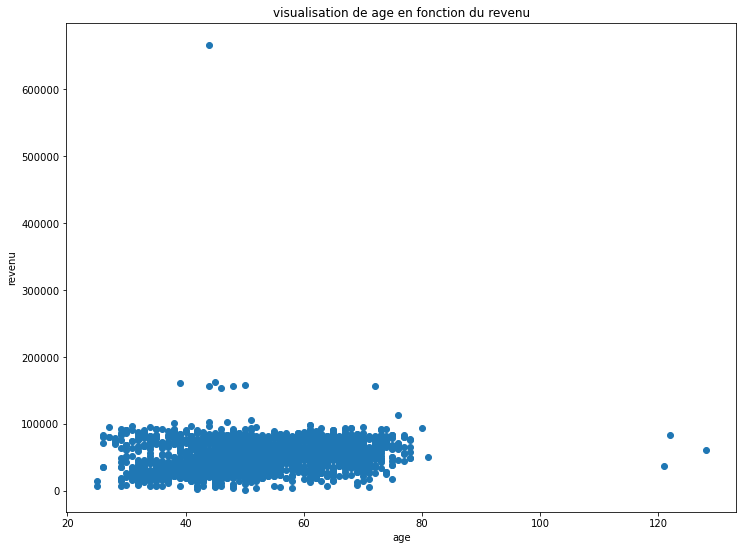

In [26]:
plt.figure(figsize =(12, 9))
plt.scatter(df.iloc[:, 24], df.iloc[:, 2])
plt.xlabel('age')
plt.ylabel('revenu')
plt.title('visualisation de age en fonction du revenu')


# preprocessing


suppression des valeur manquante 
la variable income  et la seul variable possedant des valeurs manquantes
enlever les valeur aberante
normalser les donnees réduire les dimension pour un visualisation
application de l algorithme de kmea     ns


#### encondage du dataset
la variables education est une variables qualitative ordinale donc sera encoder selon les poids des modalités


In [27]:
df = df.dropna(axis=0)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,64
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,67
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,56
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,37
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,4,5,0,0,0,0,0,0,0,54
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,5,7,0,0,0,1,0,0,0,75
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,13,6,0,1,0,0,0,0,0,40
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,10,3,0,0,0,0,0,0,0,65


In [28]:
 print(df["Education"].value_counts())

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [29]:
def encodage(dataframe):
    code = {
        'Single':0, 'Married':1, 'Divorced':2, 'Together':3, 'Widow':4, 'Alone':5, 'Absurd':6, 'YOLO':7,  
        'Basic':0, '2n Cycle':1, 'Graduation':2, 'Master':3, 'PhD':4
    }
    for col in dataframe.select_dtypes('object').columns:
        dataframe.loc[:,col] = dataframe[col].map(code)
    
    return dataframe

In [30]:
df = encodage(df)
df

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages
0,2,0,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,64
1,2,0,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,67
2,2,3,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,56
3,2,3,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,37
4,4,1,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223.0,0,1,46,709,43,182,42,...,4,5,0,0,0,0,0,0,0,54
2236,4,3,64014.0,2,1,56,406,0,30,0,...,5,7,0,0,0,1,0,0,0,75
2237,2,2,56981.0,0,0,91,908,48,217,32,...,13,6,0,1,0,0,0,0,0,40
2238,3,3,69245.0,0,1,8,428,30,214,80,...,10,3,0,0,0,0,0,0,0,65


# standardisation

Mise à l echelle des donnees   

In [31]:
ss=StandardScaler()
std= ss.fit_transform(df) 

# kmeans

Regroupement des K-moyennes
K-means est l'un des algorithmes les plus connus pour trouver des clusters, fonctionne avec de grands ensembles de données tout en étant rapide et efficace. 
### nous devons définir le nombre de clusters pour l'algorithme K-Means - Combien de clusters voulons-nous . . 
nous devons définir le nombre de clusters pour l'algorithme K-Means - Combien de clusters voulons-nous ? - 



In [32]:

sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df)
    sum_of_sqr_dist[k] = km.inertia_

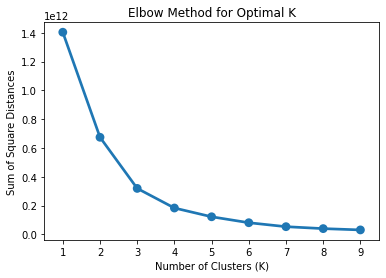

In [33]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [34]:
Model = KMeans(n_clusters=4,
             init='k-means++',
             max_iter=1000)
Model.fit(df)

KMeans(max_iter=1000, n_clusters=4)

In [35]:
print("Labels", Model.labels_)

Labels [1 1 0 ... 1 0 1]


In [36]:
print("Centroids", Model.cluster_centers_)

Centroids [[2.55604076e+00 1.55895197e+00 7.69678443e+04 8.58806405e-02
  3.50800582e-01 4.90174672e+01 6.15963610e+02 5.68515284e+01
  3.97657933e+02 8.28704512e+01 6.02008734e+01 7.01746725e+01
  1.60989811e+00 5.39737991e+00 5.45414847e+00 8.40320233e+00
  3.15574964e+00 6.84133916e-02 1.35371179e-01 2.29985444e-01
  1.83406114e-01 2.62008734e-02 7.27802038e-03 2.34352256e-01
  5.35662300e+01]
 [2.61273885e+00 1.58853503e+00 5.24200191e+04 4.05095541e-01
  8.22929936e-01 4.94420382e+01 2.93207643e+02 1.89643312e+01
  9.91898089e+01 2.51375796e+01 1.78968153e+01 4.58904459e+01
  3.11847134e+00 4.76178344e+00 2.26624204e+00 6.10063694e+00
  5.70700637e+00 6.75159236e-02 8.66242038e-02 5.09554140e-03
  1.91082803e-02 1.52866242e-02 5.09554140e-03 1.10828025e-01
  5.50292994e+01]
 [2.00000000e+00 3.00000000e+00 6.66666000e+05 1.00000000e+00
  0.00000000e+00 2.30000000e+01 9.00000000e+00 1.40000000e+01
  1.80000000e+01 8.00000000e+00 1.00000000e+00 1.20000000e+01
  4.00000000e+00 3.00000

In [37]:
centroids = Model.cluster_centers_

In [38]:
df_cluster = df.copy()
df_cluster["Cluster"] = Model.fit_predict(df)

In [39]:
df_cluster.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Cluster
0,2,0,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,64,1
1,2,0,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,67,1
2,2,3,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,56,0
3,2,3,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,37,3
4,4,1,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,40,1


In [44]:
Color = ['red', 'blue', 'black', 'gold']
df_cluster['Color'] = df_cluster['Cluster'].map(lambda p:Color[p])

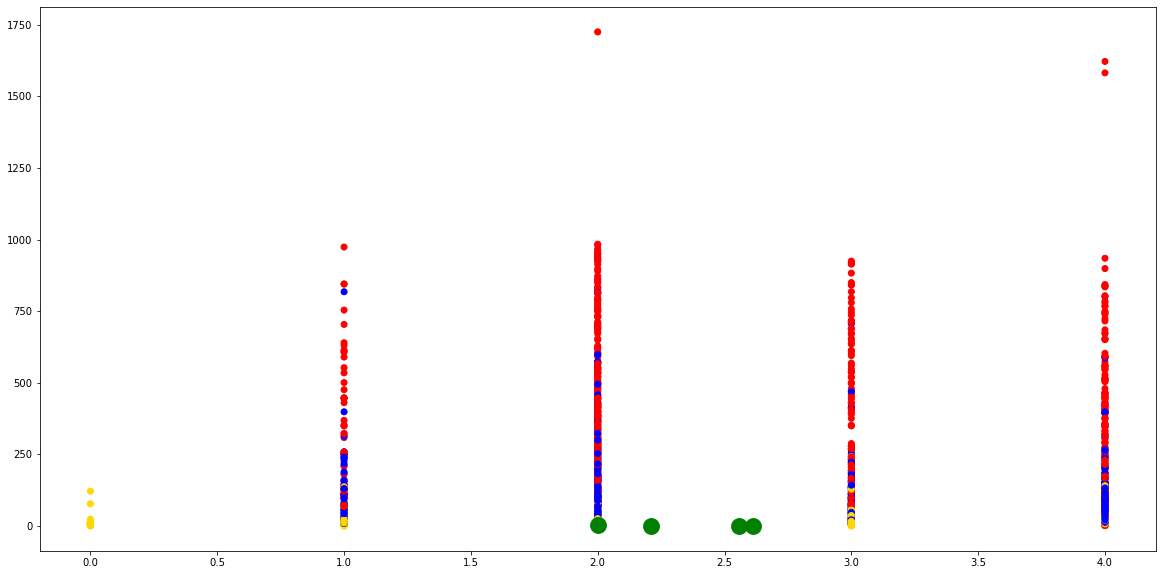

In [47]:
plt.figure(figsize=(20, 10))
plt.scatter(df["Education"],
           df['MntMeatProducts'],
           c=df_cluster["Color"])

plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=250)
plt.show()

In [48]:
labels = Model.labels_

In [49]:

silhouette_score(df, labels)

0.5412071245155089

In [51]:
silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df)
    silhouette[k] = silhouette_score(df, km.labels_)

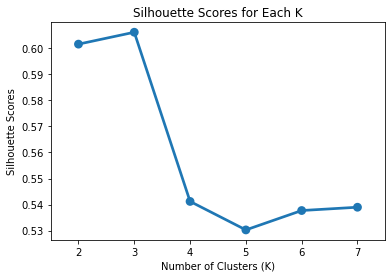

In [52]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

In [53]:
df2= df.copy()

In [54]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df2)
    sum_of_sqr_dist[k] = km.inertia_

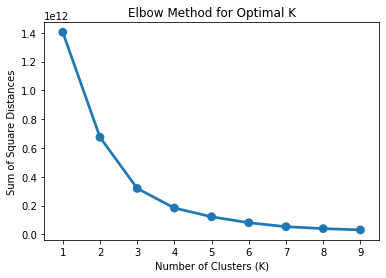

In [55]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [56]:
Model2 = KMeans(n_clusters=5, init='k-means++', max_iter=1000)
Model2.fit(df2)

KMeans(max_iter=1000, n_clusters=5)

In [57]:
df2['Cluster'] = Model2.fit_predict(df2)
df2.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Ages,Cluster
0,2,0,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,64,3
1,2,0,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,67,4
2,2,3,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,56,3
3,2,3,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,37,1
4,4,1,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,40,3


In [58]:
labels = Model2.labels_
centroids = Model2.cluster_centers_

In [65]:

df2['labels'] = labels

trace = go.Scatter3d(
                    x = df2['Marital_Status'],
                    y = df2['Income'],
                    z = df2['NumWebVisitsMonth'],
                    mode = 'markers',
                    marker=dict(color=df2['labels'], size = 12, line=dict(color=df2['labels'], width=800), opacity=0.5, )
                    )
    
data = [trace]
layout = go.Layout(
                    title='Clusters',
                    scene= dict(
                                xaxis = dict(title = 'Age'),
                                yaxis = dict(title = 'Annual Income (k$)'),
                                zaxis = dict(title = 'Spending Score (1-100)'))
                                )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()